In [ ]:
import numpy as np

try:
    w1_input = float(input("Enter initial weight w1: "))
    w2_input = float(input("Enter initial weight w2: "))
    threshold = float(input("Enter the threshold: "))
    learning_rate = float(input("Enter the learning rate: "))
except ValueError:
    print("Invalid input. Please enter numbers.")
    exit()

inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

print("\nTraining a Perceptron for the AND gate")

and_targets = np.array([0, 0, 0, 1])
weights_and = np.array([w1_input, w2_input])

all_correct = False
epoch = 0

while not all_correct:
    epoch += 1
    all_correct = True
    print(f"\nEpoch {epoch}")

    for i in range(len(inputs)):
        current_input = inputs[i]
        target = and_targets[i]
        summation = np.dot(current_input, weights_and)
        output = 1 if summation > threshold else 0

        print(f"  Input: {current_input}, Target: {target}, Output: {output}")Untitled4

        if output != target:
            all_correct = False
            error = target - output
            weights_and = weights_and + learning_rate * error * current_input
            print(f"  --> Mismatch! New weights: w1 = {weights_and[0]:.4f}, w2 = {weights_and[1]:.4f}")
            break

print("\nAND Gate Training Complete")
print(f"Final weights for AND: w1 = {weights_and[0]:.4f}, w2 = {weights_and[1]:.4f}")
print(f"Threshold: {threshold}")


print("\n\nTraining a Perceptron for the OR gate")

or_targets = np.array([0, 1, 1, 1])
weights_or = np.array([w1_input, w2_input])

all_correct = False
epoch = 0

while not all_correct:
    epoch += 1
    all_correct = True
    print(f"\nEpoch {epoch}")

    for i in range(len(inputs)):
        current_input = inputs[i]
        target = or_targets[i]

        summation = np.dot(current_input, weights_or)
        output = 1 if summation > threshold else 0

        print(f"  Input: {current_input}, Target: {target}, Output: {output}")

        if output != target:
            all_correct = False
            error = target - output
            weights_or = weights_or + learning_rate * error * current_input
            print(f"  --> Mismatch! New weights: w1 = {weights_or[0]:.4f}, w2 = {weights_or[1]:.4f}")
            break

print("\nOR Gate Training Complete")
print(f"Final weights for OR: w1 = {weights_or[0]:.4f}, w2 = {weights_or[1]:.4f}")
print(f"Threshold: {threshold}")


SyntaxError: invalid syntax (ipython-input-3135585892.py, line 38)

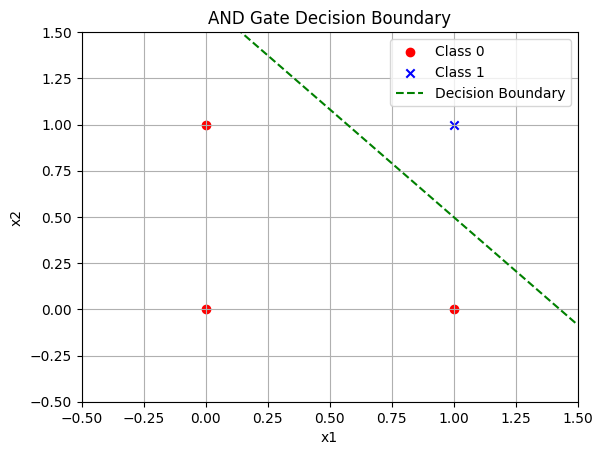

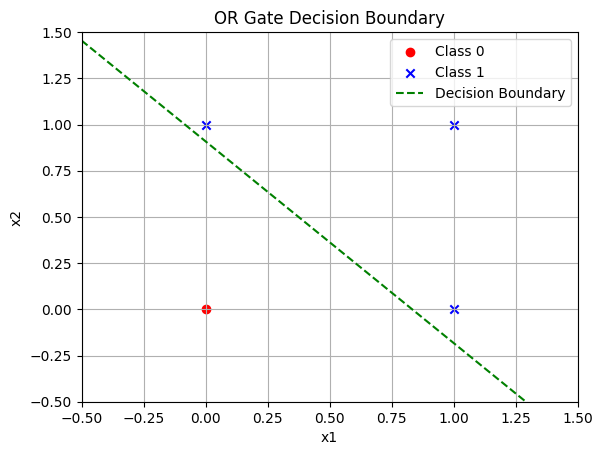

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(weights, threshold, inputs, targets, title):
    x1_vals = np.linspace(-0.5, 1.5, 100)

    if weights[1] != 0:
        x2_vals = (threshold - weights[0] * x1_vals) / weights[1]
    else:
        x2_vals = np.full_like(x1_vals, -1)

    for input_point, target in zip(inputs, targets):
        if target == 0:
            plt.scatter(input_point[0], input_point[1], color='red', marker='o', label='Class 0' if 'Class 0' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(input_point[0], input_point[1], color='blue', marker='x', label='Class 1' if 'Class 1' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.plot(x1_vals, x2_vals, 'g--', label='Decision Boundary')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(weights_and, threshold, inputs, and_targets, 'AND Gate Decision Boundary')
plot_decision_boundary(weights_or, threshold, inputs, or_targets, 'OR Gate Decision Boundary')
